<a href="https://colab.research.google.com/github/kellianneyang/food-sales-predictions/blob/main/Project_1_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Kellianne Yang

# **Project 1: Food Sales Prediction**

---

## **Loading Data**

In [8]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# import libraries
import pandas as pd

In [10]:
# load the dataset; dataset has header
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)

In [11]:
# display summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
# display first 20 rows
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Data Dictionary

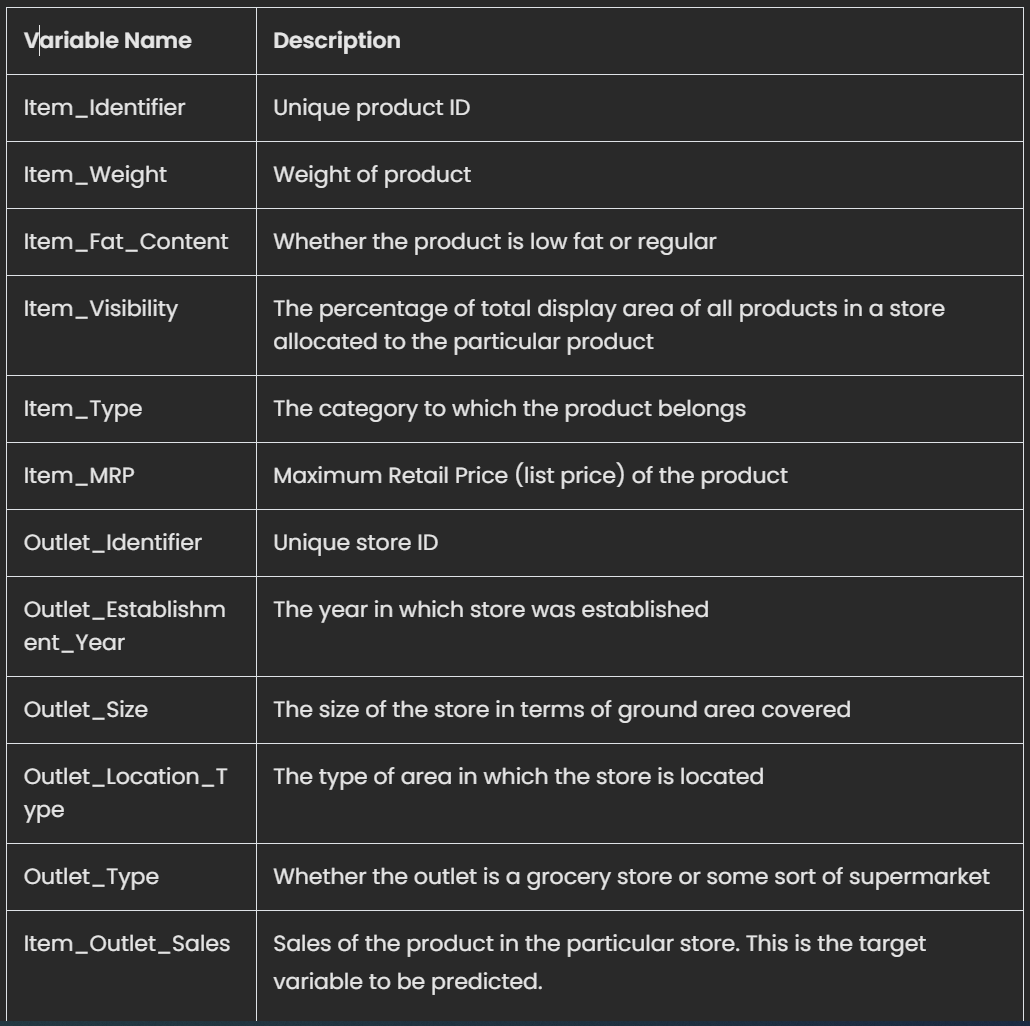

## **Data Cleaning**

### 1. How many rows and columns?


In [13]:
df.shape

(8523, 12)

In [14]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.")

There are 8523 rows and 12 columns in this dataset.


### 2. What are the dataypes of each variable?

In [15]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### 3. Are there duplicates? If so, drop any duplicates.

In [16]:
# see how many duplicates there are 
dup = df.duplicated().sum()

In [17]:
print(f"There are {dup} duplicates in the dataset.")

There are 0 duplicates in the dataset.


### 4. Identify missing values.

In [18]:
# see how many missing values there are in each column
sum_missing = df.isna().sum()
sum_missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
# calculate percentage of missing values for Item_Weight
count_missing_Item_Weight = sum_missing.loc['Item_Weight']
percent_missing_Item_Weight = (((count_missing_Item_Weight) / (df.shape[0])*100)).round(2)
print(f"There are {count_missing_Item_Weight} missing values in the Item_Weight column, representing {percent_missing_Item_Weight}% of values missing.")

There are 1463 missing values in the Item_Weight column, representing 17.17% of values missing.


In [20]:
# calculate percentage of missing values for Outlet_Size
count_missing_Outlet_Size = sum_missing.loc['Outlet_Size']
percent_missing_Outlet_Size = (((count_missing_Outlet_Size) / (df.shape[0])*100)).round(2)
print(f"There are {count_missing_Outlet_Size} missing values in the Item_Weight column, representing {percent_missing_Outlet_Size}% of values missing.")

There are 2410 missing values in the Item_Weight column, representing 28.28% of values missing.


### 5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).



- I will NOT delete the columns missing values, because the percents of missing values in those columns are not over 50%. 

- I will NOT delete the rows missing values, because at most they would have two out of 12 values missing.

- I WILL impute the missing values. I address imputation for both columns below.

In [21]:
# Item_Weight missing values
# find same item (via Item_Identifier) at other stores to fill in missing Item_Weight

# loop through all the rows in the df
for index in df.index:

  # create a filter for only items whose Item_Identifier matches that of the current row
  item_identifier_filter = df['Item_Identifier'] == df.loc[index, 'Item_Identifier']

  # calculate the mean item weight of the items in the filter
  mean_item_weight = df.loc[item_identifier_filter, 'Item_Weight'].mean()

  # assign the mean_item_weight to the Item_Weight column in this row
  df.loc[index, 'Item_Weight'] = mean_item_weight



In [22]:
# check if all Item_Weights have been imputed
df.isna().sum()['Item_Weight']

4

In [23]:
# check the 4 items left that are missing their Item_Weight
filtered_df = df[df['Item_Weight'].isna()]
filtered_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [24]:
# confirm that these Item_Identifiers each only appeared in the dataset once
for index, row in filtered_df.iterrows():
  identifier = row['Item_Identifier']
  number = df['Item_Identifier'].value_counts()[identifier]
  print(f"The Item_Idenfier {identifier} appears in the dataset {number} time(s).")

The Item_Idenfier FDN52 appears in the dataset 1 time(s).
The Item_Idenfier FDK57 appears in the dataset 1 time(s).
The Item_Idenfier FDE52 appears in the dataset 1 time(s).
The Item_Idenfier FDQ60 appears in the dataset 1 time(s).


In [25]:
# since they are all unique items, their Item_Weight is unknown
# set their Item_Weights to the average Item_Weight

for index, row in filtered_df.iterrows():
  df.loc[index, 'Item_Weight'] = df['Item_Weight'].mean()

In [26]:
# check if all Item_Weights have been imputed
df.isna().sum()['Item_Weight']

0

In [27]:
# alternate solution to impute missing Item_Weights:
# address missing data in Item_Weight (numeric data) by filling in missing values with mean
# get mean of Item_Weight
# mean_weight = df['Item_Weight'].mean()
# impute missing Item_Weight values with mean_weight
# df['Item_Weight'].fillna(mean_weight, inplace = True)

In [28]:
# Outlet_Size missing values

# find same outlet (via Outlet_Identifier) in other rows to fill in missing Outlet_Size

In [29]:
# loop through all the rows in the df
for index in df.index:

  # create a filter for only items whose Item_Identifier matches that of the current row
  outlet_identifier_filter = df['Outlet_Identifier'] == df.loc[index, 'Outlet_Identifier']

  # calculate the mean item weight of the items in the filter
  outlet_size = df.loc[outlet_identifier_filter, 'Outlet_Size'].min()

  # assign the mean_item_weight to the Item_Weight column in this row
  df.loc[index, 'Outlet_Size'] = outlet_size



In [30]:
# check if all Outlet_Sizes have been imputed
df.isna().sum()['Outlet_Size']

2410

In [31]:
# none of the Outlet_Identifiers missing their Outlet_Size had an Outlet_Size in another row

# since they are all unique outlets, their Outlet_Size is unknown
# set their Outlet_Sizes to 'Unknown'

df['Outlet_Size'].fillna('Unknown', inplace = True)

In [32]:
# check if all Outlet_Sizes have been imputed
df.isna().sum()['Outlet_Size']

0

In [33]:
# alternate solution:
# address missing data in Outlet_Size (categorical data)
# see the distribution of categories
# size_value_counts = df['Outlet_Size'].value_counts()
# display(size_value_counts)
# not ideal to use mode since number of 'Medium' and 'Small' stores are similar
# but will use mode since it will introduce the fewest number of errors compared to other categories
# df['Outlet_Size'].fillna('Medium', inplace = True)

### 6. Confirm that there are no missing values after addressing them.

In [34]:
missing = df.isna().sum().sum()
print(f"There are {missing} missing values remaining.")

There are 0 missing values remaining.


### 7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).



In [35]:
df.describe(include = 'object').round(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [36]:
# create list of object type columns
dtypes = df.dtypes
object_dtypes = dtypes[dtypes == 'object']
object_dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [37]:
# print the unique values for all the object type columns to look for inconsistent category names
for column in object_dtypes.index:
  print(column)
  print(df[column].unique())
  print('')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Size
['Medium' 'Unknown' 'High' 'Small']

Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [38]:
# check out how many items belong to each category for object type columns
for column in object_dtypes.index:
  print(column)
  print(df[column].value_counts())
  print('')

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

In [39]:
# fix Item_Fat_Content values to make consistent

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

# check results
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [40]:
# fix Outlet_Size values

# I would ask the source of the data if 'High' should be 'Large', but for now
# I will assume it should be, and replace it

df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')

# check results
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

### 8. For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [41]:
df.describe(include = 'number').round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.88,0.07,140.99,1997.83,2181.29
std,4.65,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.78,0.03,93.83,1987.00,834.25
50%,12.65,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


---

## **Project 1 - Part 3 (Core)**

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:



- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

In [45]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 432x288 with 0 Axes>

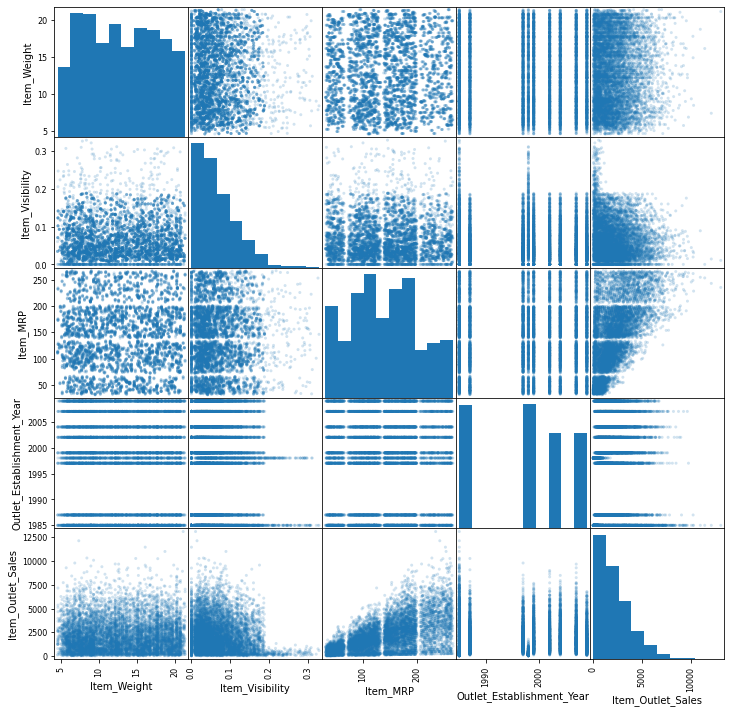

In [46]:
# explore possible scatterplots and histograms of numerical variables
plt.figure()
scatter_matrix(df, alpha = 0.2, figsize=(12, 12), diagonal = 'hist')
plt.show();

In [47]:
# follow up on:
# some degree of correlation: Item_Outlet_Sales and Item_MRP
# strange cliff: Item_Outlet_Sales and Item_Visibility

In [48]:
# explore histograms and boxplots: Item_Outlet_Sales grouped by all other variables

In [49]:
# select the categorical variable columns to draw exploratory grouped-by boxplots and histograms
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

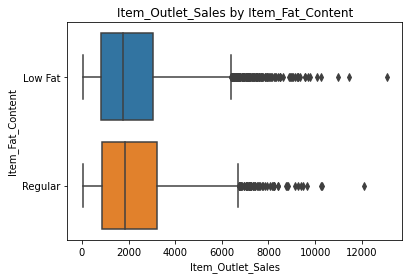

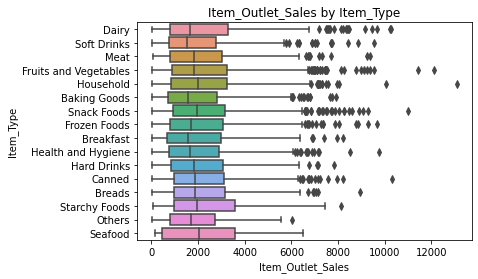

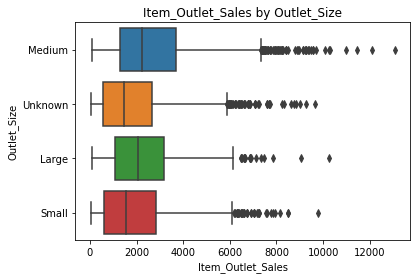

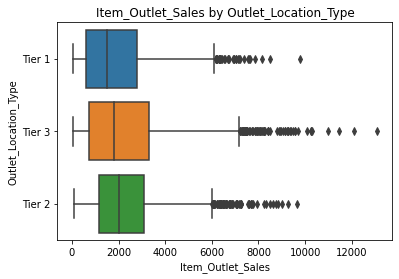

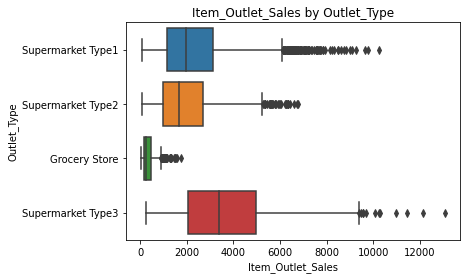

In [50]:
# create and view boxplots
for col in cat_cols:
  col_name = col
  col = sns.boxplot(x = 'Item_Outlet_Sales', y = col, data = df)
  col.set_title('Item_Outlet_Sales by ' + col_name)
  plt.show()
  

In [51]:
# create and view histograms

In [52]:
df['Item_Fat_Content'].value_counts() # Low Fat, Regular

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

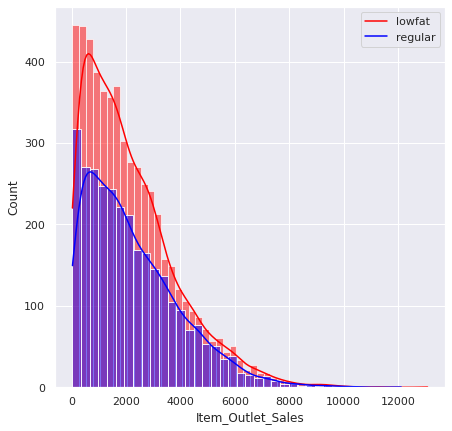

In [53]:
# Item_Outlet_Sales for "Low Fat" vs. "Regular"

lowfat_df = df[df['Item_Fat_Content'] == 'Low Fat']
regular_df = df[df['Item_Fat_Content'] == 'Regular']

sns.set(style = 'darkgrid')
fig, axes = plt.subplots(1, 1, figsize = (7, 7))
sns.histplot(x = 'Item_Outlet_Sales', data = lowfat_df, kde = True, color = 'red')
sns.histplot(x = 'Item_Outlet_Sales', data = regular_df, kde = True, color = 'blue')
plt.legend(loc = 'best', labels = ['lowfat', 'regular'])
plt.show()

In [54]:
df['Item_Type'].value_counts()
# Fruits and Vegetables
# Snack Foods
# Household
# Frozen Foods
# Dairy
# Canned
# Baking Goods
# Health and Hygiene
# Soft Drinks
# Meat
# Breads
# Hard Drinks
# Others
# Starchy Foods
# Breakfast
# Seafood

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

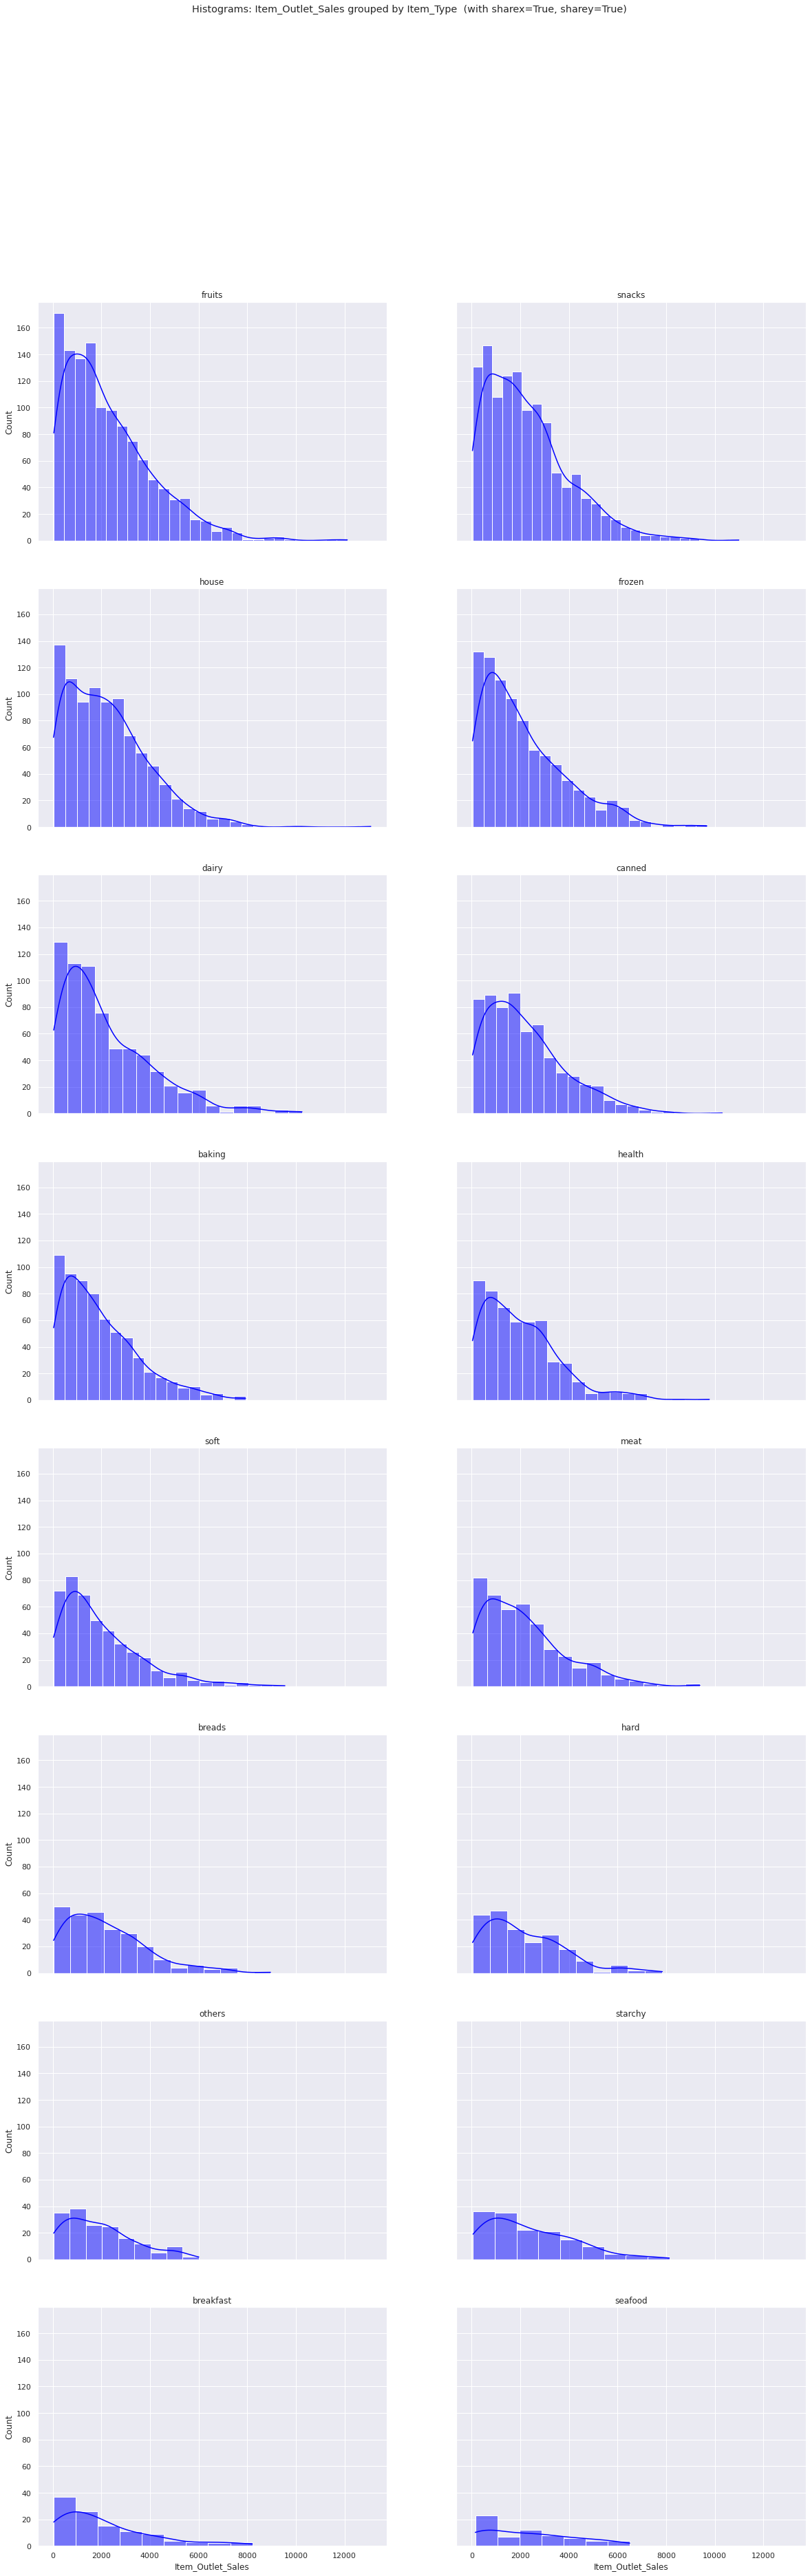

In [55]:
# Item_Outlet_Sales for each Item_Type (8 x 2)

fruits_df = df[df['Item_Type'] == 'Fruits and Vegetables']
snacks_df = df[df['Item_Type'] == 'Snack Foods']
house_df = df[df['Item_Type'] == 'Household']
frozen_df = df[df['Item_Type'] == 'Frozen Foods']
dairy_df = df[df['Item_Type'] == 'Dairy']
canned_df = df[df['Item_Type'] == 'Canned']
baking_df = df[df['Item_Type'] == 'Baking Goods']
health_df = df[df['Item_Type'] == 'Health and Hygiene']
soft_df = df[df['Item_Type'] == 'Soft Drinks']
meat_df = df[df['Item_Type'] == 'Meat']
breads_df = df[df['Item_Type'] == 'Breads']
hard_df = df[df['Item_Type'] == 'Hard Drinks']
others_df = df[df['Item_Type'] == 'Others']
starchy_df = df[df['Item_Type'] == 'Starchy Foods']
breakfast_df = df[df['Item_Type'] == 'Breakfast']
seafood_df = df[df['Item_Type'] == 'Seafood']

sns.set(style = 'darkgrid')
fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (20,60), sharey=True, sharex=True)
sns.histplot(x = 'Item_Outlet_Sales', data = fruits_df, kde = True, color = 'blue', ax = axes[0,0]).set(title = 'fruits')
sns.histplot(x = 'Item_Outlet_Sales', data = snacks_df, kde = True, color = 'blue', ax = axes[0,1]).set(title = 'snacks')
sns.histplot(x = 'Item_Outlet_Sales', data = house_df, kde = True, color = 'blue', ax = axes[1,0]).set(title = 'house')
sns.histplot(x = 'Item_Outlet_Sales', data = frozen_df, kde = True, color = 'blue', ax = axes[1,1]).set(title = 'frozen')
sns.histplot(x = 'Item_Outlet_Sales', data = dairy_df, kde = True, color = 'blue', ax = axes[2,0]).set(title = 'dairy')
sns.histplot(x = 'Item_Outlet_Sales', data = canned_df, kde = True, color = 'blue', ax = axes[2,1]).set(title = 'canned')
sns.histplot(x = 'Item_Outlet_Sales', data = baking_df, kde = True, color = 'blue', ax = axes[3,0]).set(title = 'baking')
sns.histplot(x = 'Item_Outlet_Sales', data = health_df, kde = True, color = 'blue', ax = axes[3,1]).set(title = 'health')
sns.histplot(x = 'Item_Outlet_Sales', data = soft_df, kde = True, color = 'blue', ax = axes[4,0]).set(title = 'soft')
sns.histplot(x = 'Item_Outlet_Sales', data = meat_df, kde = True, color = 'blue', ax = axes[4,1]).set(title = 'meat')
sns.histplot(x = 'Item_Outlet_Sales', data = breads_df, kde = True, color = 'blue', ax = axes[5,0]).set(title = 'breads')
sns.histplot(x = 'Item_Outlet_Sales', data = hard_df, kde = True, color = 'blue', ax = axes[5,1]).set(title = 'hard')
sns.histplot(x = 'Item_Outlet_Sales', data = others_df, kde = True, color = 'blue', ax = axes[6,0]).set(title = 'others')
sns.histplot(x = 'Item_Outlet_Sales', data = starchy_df, kde = True, color = 'blue', ax = axes[6,1]).set(title = 'starchy')
sns.histplot(x = 'Item_Outlet_Sales', data = breakfast_df, kde = True, color = 'blue', ax = axes[7,0]).set(title = 'breakfast')
sns.histplot(x = 'Item_Outlet_Sales', data = seafood_df, kde = True, color = 'blue', ax = axes[7,1]).set(title = 'seafood')
fig.suptitle("Histograms: Item_Outlet_Sales grouped by Item_Type  (with sharex=True, sharey=True)")
plt.show()

In [56]:
df['Outlet_Size'].value_counts() # Medium, Small, Large

Medium     2793
Unknown    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

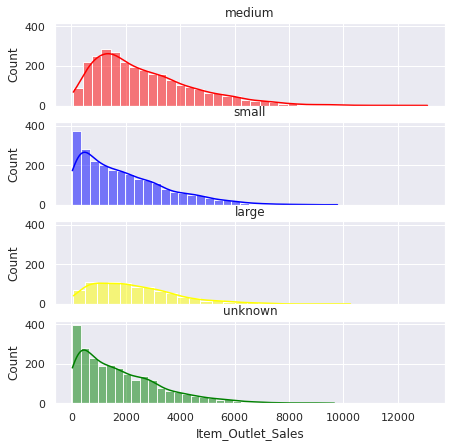

In [66]:
# Item_Outlet_Sales for "Medium" vs. "Small" vs. "Large" Outlet_Size

medium_df = df[df['Outlet_Size'] == 'Medium']
small_df = df[df['Outlet_Size'] == 'Small']
large_df = df[df['Outlet_Size'] == 'Large']
unknown_df = df[df['Outlet_Size'] == 'Unknown']

sns.set(style = 'darkgrid')
fig, axes = plt.subplots(nrows = 4, figsize = (7, 7), sharey=True, sharex=True)
sns.histplot(x = 'Item_Outlet_Sales', data = medium_df, kde = True, color = 'red', ax = axes[0]).set(title = 'medium')
sns.histplot(x = 'Item_Outlet_Sales', data = small_df, kde = True, color = 'blue', ax = axes[1]).set(title = 'small')
sns.histplot(x = 'Item_Outlet_Sales', data = large_df, kde = True, color = 'yellow', ax = axes[2]).set(title = 'large')
sns.histplot(x = 'Item_Outlet_Sales', data = unknown_df, kde = True, color = 'green', ax = axes[3]).set(title = 'unknown')
plt.show()

In [58]:
df['Outlet_Location_Type'].value_counts() # Tier 1, Tier 2, Tier 3

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

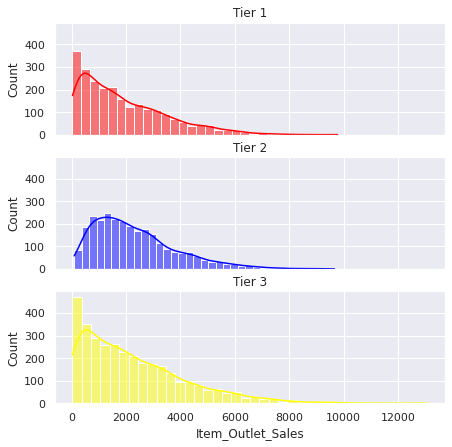

In [59]:
# Item_Outlet_Sales for "Tier 1" vs. "Tier 2" vs. "Tier 3" Outlet_Location_Type

tier1_df = df[df['Outlet_Location_Type'] == 'Tier 1']
tier2_df = df[df['Outlet_Location_Type'] == 'Tier 2']
tier3_df = df[df['Outlet_Location_Type'] == 'Tier 3']

sns.set(style = 'darkgrid')
fig, axes = plt.subplots(nrows = 3, figsize = (7, 7), sharey=True, sharex=True)
sns.histplot(x = 'Item_Outlet_Sales', data = tier1_df, kde = True, color = 'red', ax = axes[0]).set(title = 'Tier 1')
sns.histplot(x = 'Item_Outlet_Sales', data = tier2_df, kde = True, color = 'blue', ax = axes[1]).set(title = 'Tier 2')
sns.histplot(x = 'Item_Outlet_Sales', data = tier3_df, kde = True, color = 'yellow', ax = axes[2]).set(title = 'Tier 3')
plt.show()

In [60]:
df['Outlet_Type'].value_counts() # Grocery Store, Supermarket Type1,
# Supermarket Type2, Supermarket Type3

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

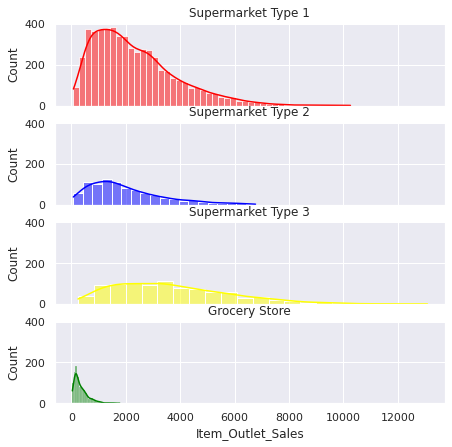

In [61]:
# Item_Outlet_Sales for "Supermarket Type1" vs. "Supermarket Type2" vs. "Supermarket Type3" vs. Grocery Store Outlet_Type

super1_df = df[df['Outlet_Type'] == 'Supermarket Type1']
super2_df = df[df['Outlet_Type'] == 'Supermarket Type2']
super3_df = df[df['Outlet_Type'] == 'Supermarket Type3']
grocery_df = df[df['Outlet_Type'] == 'Grocery Store']

sns.set(style = 'darkgrid')
fig, axes = plt.subplots(nrows = 4, figsize = (7, 7), sharey=True, sharex=True)
sns.histplot(x = 'Item_Outlet_Sales', data = super1_df, kde = True, color = 'red', ax = axes[0]).set(title = 'Supermarket Type 1')
sns.histplot(x = 'Item_Outlet_Sales', data = super2_df, kde = True, color = 'blue', ax = axes[1]).set(title = 'Supermarket Type 2')
sns.histplot(x = 'Item_Outlet_Sales', data = super3_df, kde = True, color = 'yellow', ax = axes[2]).set(title = 'Supermarket Type 3')
sns.histplot(x = 'Item_Outlet_Sales', data = grocery_df, kde = True, color = 'green', ax = axes[3]).set(title = 'Grocery Store')
plt.show()

In [62]:
# More potential groupings if needed: Item_Outlet_Sales grouped by (Outlet_Type OR Outlet_Location_Type) AND Item_MRP

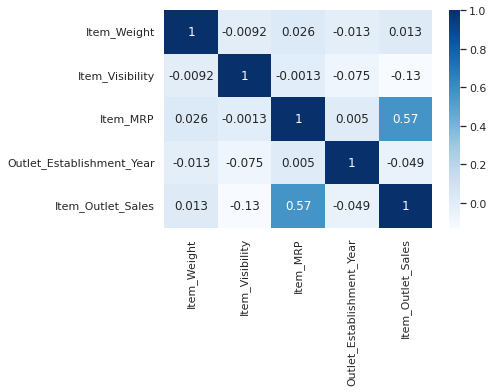

In [63]:
# explore heatmap of correlation between features

corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True);

In [68]:
# moderate degree of correlation: Item_MRP and Item_Outlet_Sales